In [22]:
#Basic import commands
# --- Core Libraries ---
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Sklearn Tools for Preprocessing ---
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Sklearn Tools for Models & Analysis ---
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# --- Sklearn Tools for Evaluation ---
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# --- Datasets to Load ---
from sklearn.datasets import load_iris, load_diabetes

# This makes plots appear in your notebook
%matplotlib inline


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# DPV Lab Exam Study Notebook

Welcome to a guided tutorial practice session for data visualization lab. We will cover various case studies that link all the concepts together.

Let's start.

# Problem: Iris Flower Classification with KNN and PCA

A botanical research team is working on an automated plant classification system. They want to identify the species of an iris flower based on its sepal length, sepal width, petal length, and petal width.

They collect a dataset (the famous Iris dataset) containing 150 flower samples belonging to 3 species:
* Iris-setosa
* Iris-versicolor
* Iris-virginica

The researchers decide to use the K-Nearest Neighbors (KNN) algorithm for classification.

### Tasks:

**1. Preprocess the dataset:**
* Handle missing values (if any).
* Standardize the features.
* Reduce dimensions using PCA (2D) for visualization.

**2. Apply KNN classification:**
* Use `train_test_split()` to divide the dataset into training (70%) and testing (30%) sets.
* Train a KNN classifier with `k=5`.

**3. Evaluate the model:**
* Print accuracy score and classification report.
* Visualize the dataset in 2D after PCA, showing how the classes are separated.

**4. Answer the following questions:**
* a) What accuracy did the KNN model achieve on the test set?
* b) If a new flower has the following features:
    * Sepal length = 5.8
    * Sepal width = 2.7
    * Petal length = 5.1
    * Petal width = 1.9
    What species will the KNN model classify it as?
* c) How does the choice of k affect the classification results? (Try `k=3` and `k=7` and compare).

## Case Study 1: Iris Flower Classification (PCA & KNN)

**Goal:** We have a dataset of 150 iris flowers, each with 4 features (sepal length, sepal width, petal length, petal width). We want to:
1.  Use **PCA** to see if we can "squash" these 4 features into 2 and still tell the 3 species apart.
2.  Build a **KNN** model to classify the flowers automatically.

### Step 1: Load and Standardize the Data

**Question:** Why do we standardize?
**Answer:** Look at the data: "Age" (1-100) and "Fare" (0-500) are on different scales. **PCA and KNN are both distance-based.** They will *wrongly* assume "Fare" is more important just because the number is bigger.

**`StandardScaler`** solves this. [cite_start]It rescales all features so they have a **mean of 0** and a **standard deviation of 1**[cite: 847, 2570]. [cite_start]You MUST do this before PCA and KNN [cite: 1049, 1369, 3146-3149].

->Accuracy: 0.9555555555555556

->Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



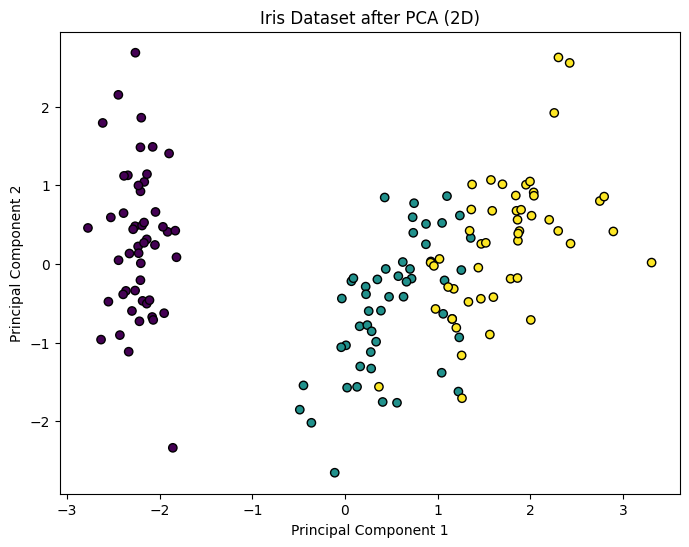


->New Flower Prediction: virginica

->Accuracy with k=3: 0.9555555555555556

->Accuracy with k=7: 0.9555555555555556


In [23]:
iris=load_iris()
#Step 1: Load dataset
X=iris.data
Y=iris.target

#Step 2: Preprocessing
X=np.nan_to_num(X) #Handle missing values
scaler=StandardScaler()
XScaled=scaler.fit_transform(X) #Standardize features

#Step 3: PCA (2D for Visualization)
pca=PCA(n_components=2)
XPca=pca.fit_transform(XScaled)

#Step 4: Train-test split (70% train, 30% test)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(
    XPca,Y,test_size=0.3,random_state=42
)

#Step 5: Train KNN model with k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain,Ytrain)

#Step 6: Predictions & Evaluation
Ypred=knn.predict(Xtest)
print("->Accuracy:",accuracy_score(Ytest,Ypred))
print("\n->Classification Report:\n",classification_report(Ytest,Ypred,target_names=iris.target_names))

#Step 7: Visualization after PCA
plt.figure(figsize=(8,6))
plt.scatter(XPca[:,0],XPca[:,1],c=Y,cmap="viridis",edgecolor="k")
plt.title("Iris Dataset after PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#Step 8: Predict new flower
newFlower=np.array([[5.8,2.7,5.1,1.9]]) #new flower input
newFlowerScaled=scaler.transform(newFlower)
newFlowerPca=pca.transform(newFlowerScaled)
prediction=knn.predict(newFlowerPca)
print("\n->New Flower Prediction:",iris.target_names[prediction[0]])

#Step 9: Effect of different k values
for k in [3,7]:
    knnAlt=KNeighborsClassifier(n_neighbors=k)
    knnAlt.fit(Xtrain,Ytrain)
    YpredAlt=knnAlt.predict(Xtest)
    print(f"\n->Accuracy with k={k}: {accuracy_score(Ytest,YpredAlt)}")

# Case Study 2: Financial Stock Analysis (KMeans & PCA)

**Problem:** A portfolio management company is studying the performance of major tech companies and wants to group them based on their risk and return profiles. They have collected daily stock prices for six companies from Jan 2022 to Jan 2023:
* Apple (AAPL)
* Microsoft (MSFT)
* Google (GOOGL)
* Amazon (AMZN)
* Tesla (TSLA)
* Meta (META)

**Goal:** Use **KMeans Clustering** to group these companies into two clusters (e.g., "high-risk/high-return" vs. "low-risk/stable") and visualize the groupings using **PCA**.

### Your Tasks:

**1. Data Acquisition & Preprocessing:**
* Download the "Adjusted Close" prices for the companies using the `yfinance` library.
* Calculate the **daily returns** (`.pct_change()`).
* Compute the two features we will cluster on:
    * **Mean Return** (the average of daily returns).
    * **Volatility** (the standard deviation of daily returns).
* **Standardize** these two features (`MeanReturn`, `Volatility`) using `StandardScaler`.

**2. Clustering & Visualization:**
* Apply **KMeans clustering** with `k=2` to the *standardized* features.
* Assign each company to its new cluster.
* Perform **PCA** (2D) on the *standardized* features to prepare for visualization.
* Plot the companies on a **scatterplot** (PC1 vs. PC2) and color the dots based on their assigned cluster.

**3. Analysis & Interpretation:**
* a) Which companies fall into the same cluster?
* b) By looking at the `Volatility` feature, identify which cluster represents the riskier investments.
* c) If you were a risk-averse investor, which cluster would you choose?
* d) What would happen if we increased k to 3? (Discuss briefly).

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14268\3771271781.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download(companies,start='2022-01-01',end="2023-01-01")["Close"]
[*********************100%***********************]  6 of 6 completed



->Financial Features:
         MeanReturn  Volatality
Ticker                        
AAPL     -0.001074    0.022471
AMZN     -0.002329    0.031571
GOOGL    -0.001689    0.024396
META     -0.003262    0.040555
MSFT     -0.001049    0.022289
TSLA     -0.003847    0.041155


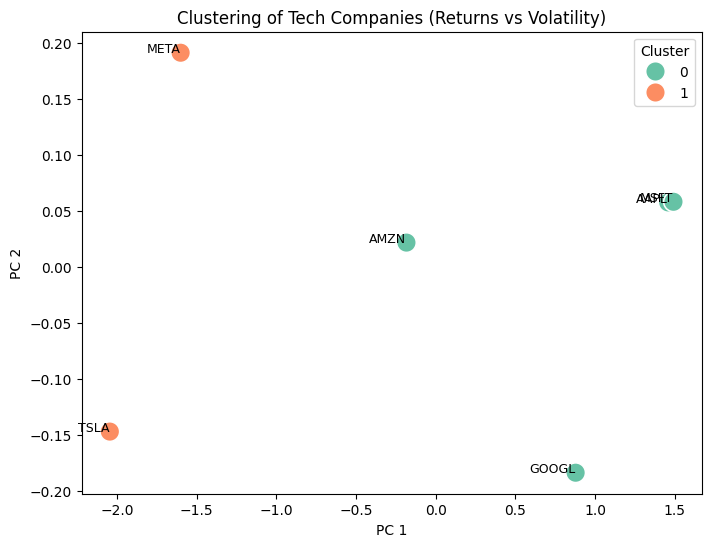


->Clustering Results:
         MeanReturn  Volatality  Cluster
Ticker                                 
AAPL     -0.001074    0.022471        0
AMZN     -0.002329    0.031571        0
GOOGL    -0.001689    0.024396        0
META     -0.003262    0.040555        1
MSFT     -0.001049    0.022289        0
TSLA     -0.003847    0.041155        1


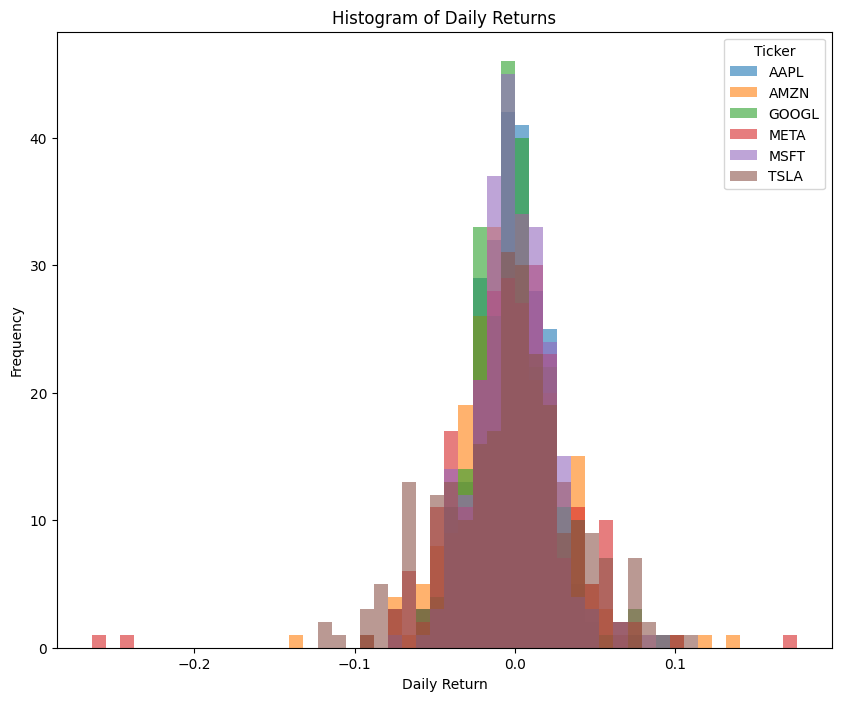

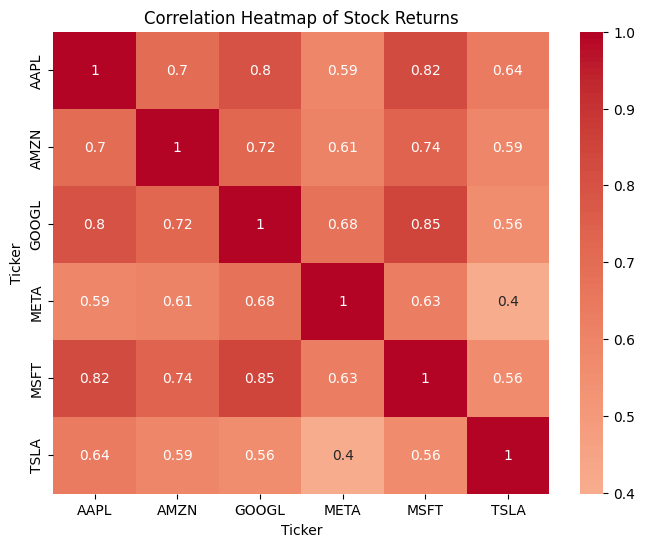

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Step 1: Download stock Data
companies=["AAPL","MSFT","GOOGL","AMZN","TSLA","META"]
data= yf.download(companies,start='2022-01-01',end="2023-01-01")["Close"]

#Step 2: Data Preprocessing
returns=data.pct_change().dropna() #Daily returns
mean_ret=returns.mean()
volatility=returns.std()
features =pd.DataFrame({
    "MeanReturn": mean_ret,
    "Volatality":volatility
})
print("\n->Financial Features:\n",features)

#Step 3: Standardization
scaler=StandardScaler()
XScaled=scaler.fit_transform(features)

#Step 4: Clustering(KMeans)
kmeans=KMeans(n_clusters=2,random_state=42,n_init=10)
clusters=kmeans.fit_predict(XScaled)
features["Cluster"]=clusters

#Step 5: PCA for visualization
pca = PCA(n_components=2)
XPca=pca.fit_transform(XScaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=XPca[:,0],
    y=XPca[:,1],
    hue=features["Cluster"],
    s=200,
    palette="Set2"
)

# Add company labels near each point 
for i, company in enumerate(features.index):
    plt.text(XPca[i,0],XPca[i,1],company,fontsize=9,ha="right")
plt.title("Clustering of Tech Companies (Returns vs Volatility)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()
print("\n->Clustering Results:\n",features)

#Histogram of daily returns for all companies
returns.plot(kind="hist", bins=50, figsize=(10,8), alpha=0.6)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of stock returns
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Stock Returns")
plt.show()

## Case Study 2: Analysis & Interpretation

**a) Which companies fall into the same cluster?**

Based on the clustering results, the model split the companies into two distinct groups:
* **Cluster 0:** Apple (AAPL), Amazon (AMZN), Google (GOOGL), and Microsoft (MSFT).
* **Cluster 1:** Meta (META) and Tesla (TSLA).

**b) Identify which cluster represents riskier investments (higher volatility).**

**Cluster 1 is the riskier cluster.**

We can determine this by looking at the **"Volatility"** column in the features table.
* **Cluster 0** (AAPL, MSFT, etc.) had volatility values between ~0.022 and ~0.031.
* **Cluster 1** (META, TSLA) had much higher volatility values, both around ~0.040.

Since higher volatility equals higher risk, Cluster 1 represents the riskier investments.

**c) If you were an investor preferring safer investments, which cluster would you choose?**

You would choose **Cluster 0**. This cluster contains the companies with lower volatility (lower risk).

**d) What would happen if we increased k to 3? (Discuss briefly without coding).**

If we set `k=3`, the algorithm would be forced to find a third, new group.

Looking at the `features` table, the most likely outcome is that **Cluster 0 would be split**. Cluster 1 (Tesla and Meta) is already very similar in its high-risk profile, so it would likely stay together.

The new grouping might look something like this:
* **Group 1:** META, TSLA (High-risk/high-volatility)
* **Group 2:** AAPL, MSFT (Lowest-risk, very similar stats)
* **Group 3:** GOOGL, AMZN (Medium-risk, with AMZN having slightly higher volatility than the others in the original Cluster 0)

This would give a more granular breakdown, separating the "lowest-risk" from the "medium-risk" companies.

# Case Study 3: Diabetes Progression (Linear Regression)

**Scenario:** Predict diabetes disease progression using features like age, BMI, blood pressure, etc.

**Dataset:** `sklearn.datasets.load_diabetes`

**Additional Visualization:**
* **Correlation Heatmap:** to see how each feature correlates with the target (disease progression).
* **Histograms:** to visualize the distribution of features and the target.

---
### Tasks:

**A. Data Acquisition & Preprocessing:**
1.  Load the Diabetes dataset.
2.  Handle missing values. (We'll check, but `sklearn` datasets are usually clean).
3.  Create a heatmap of correlations between features and the target.
4.  Plot histograms for each feature and the target.
5.  Standardize features.
6.  Split into training (70%) and testing (30%) sets.

**B. Regression using Linear Regression:**
1.  Train a Linear Regression model.
2.  Evaluate using MSE, RMSE, and $R^2$ score.
3.  Create a scatter plot of predicted vs actual values.

Dataset Info (Checking for missing values)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB

Dataset Head(First 5 rows)         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3

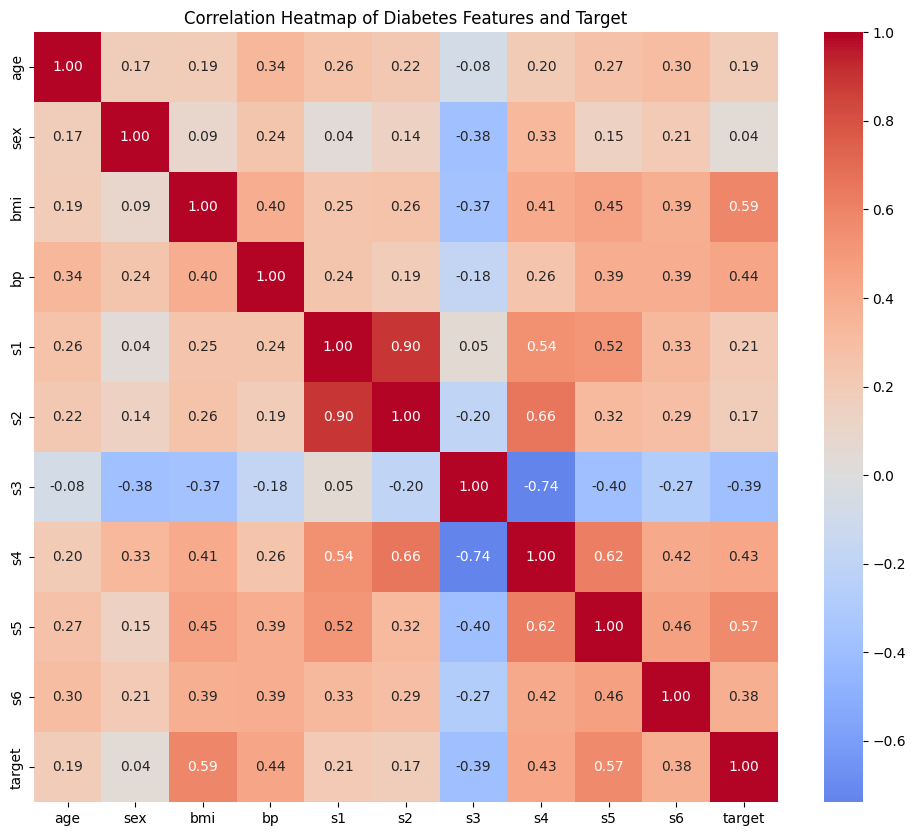


Plotting Histograms


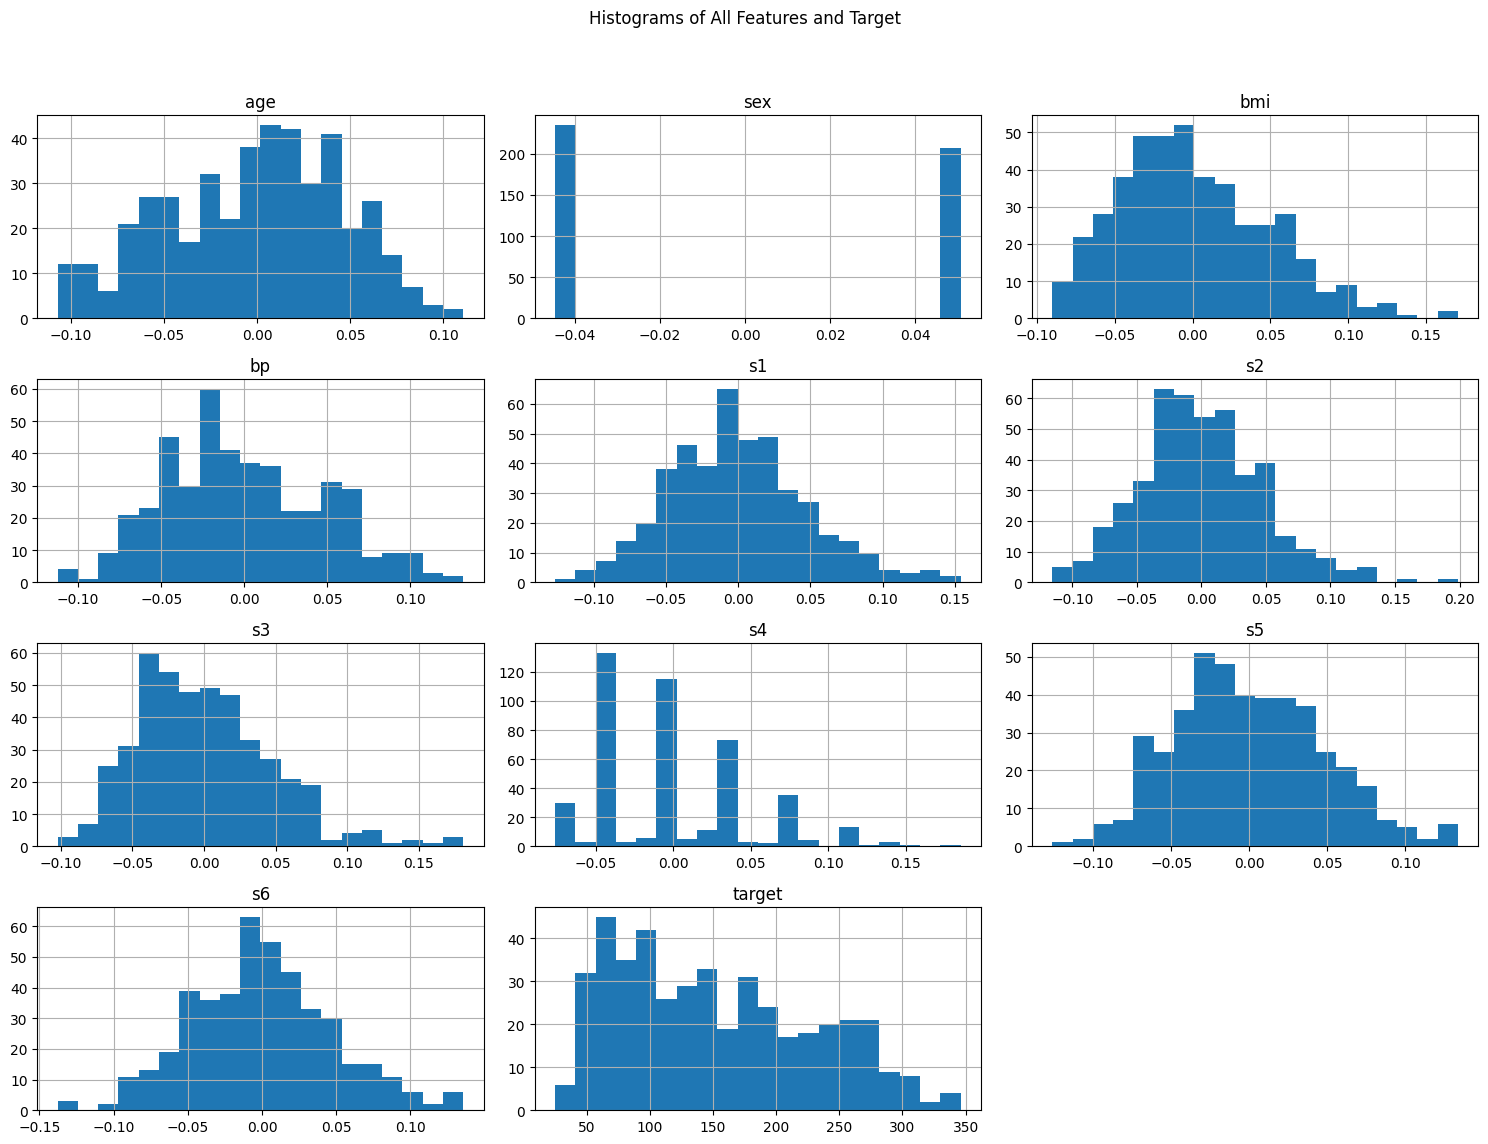

Data Shapes after splitting:
Xtrain shape: (309, 10)
Xtest shape: (133, 10)
ytrain shape: (309,)
ytest shape: (133,)

MODEL Eval:

Mean Squared Error:2821.75
Root Mean Squared Error:53.12
R-squared (R²) Score:0.48


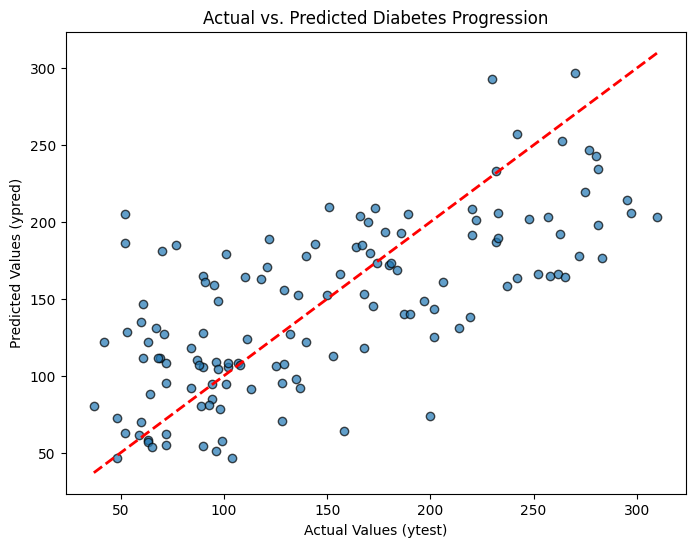

In [39]:
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

#Step 1: Load the dataset
diabetes=load_diabetes()

#Step 2: Put the features(data) and target into a pandas DataFrame
#Much easier to work with
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target']=diabetes.target

#Step 3: Check for missing values and see data types
# .info() is the best way to check for nulls
print("Dataset Info (Checking for missing values)")
df.info()

#Step 4: Display the first 5 rows to see what our data looks like
print("\nDataset Head(First 5 rows)",df.head())

#Step 5: Calculate the Correlation matrix
print("Let's plot Correlation Heatmap")
corrMat=df.corr()

#Step 6: Set up matplot fig
plt.figure(figsize=(12,10))

#Step 7: Draw the heatmanp
sns.heatmap(corrMat,annot=True,fmt='.2f',cmap='coolwarm',center=0)
plt.title('Correlation Heatmap of Diabetes Features and Target')
plt.show()

print("\nPlotting Histograms")

#Step 8: Use the built-in, .hist() function from pandas
#bins=20 means we'll have 20 bars in each histogram
#figsize sets the size of teh entire grid of plots

df.hist(bins=20, figsize=(15,12))

plt.suptitle("Histograms of All Features and Target")
plt.tight_layout(rect=[0,0.03,1,0.95]) #Adjust layout to make room for suptitle
plt.show()

#Step 9: Separate our features (X) from our target (y)
X=df.drop('target',axis=1)
y=df['target']

#Step 10:We standardize the features(X)
scaler=StandardScaler()
XScaled =scaler.fit_transform(X)

#Step 11: We split the scaled features and the target
Xtrain,Xtest,ytrain,ytest=train_test_split(XScaled,y,test_size=0.3, #30% for testing
                                           random_state=42)         #For reproducible results
#Step 12: Print the shapes to confirm the split
print("Data Shapes after splitting:")
print("Xtrain shape:",Xtrain.shape)
print("Xtest shape:",Xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:",ytest.shape)

#Step 13: Initialize the model
linearREG=LinearRegression()

#Step 14: Train (fit) the model on the training data
linearREG.fit(Xtrain,ytrain)

#Step 15: Make predictions on the unseen test data
ypred=linearREG.predict(Xtest)

#Step 16: Calculate the evaluation metrics
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse) #RMSE is the square root of MSE
r2=r2_score(ytest,ypred)
print("\nMODEL Eval:\n")
print(f"Mean Squared Error:{mse:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f"R-squared (R²) Score:{r2:.2f}")

#Step 17: Create a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(ytest,ypred,alpha=0.7,edgecolor='k')

#Step 18: Add a "perfect prediction" line
#This is a 45-degree line where ytest==ypred
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'r--',lw=2)

#Labels and title
plt.xlabel("Actual Values (ytest)")
plt.ylabel("Predicted Values (ypred)")
plt.title("Actual vs. Predicted Diabetes Progression")
plt.show()

# Case Study 4: Wine Classification (PCA & KNN)

**Scenario:** Classify wines into three different types (classes) based on their chemical properties.

**Dataset:** `sklearn.datasets.load_wine`

**Additional Visualization:**
* **Heatmap:** correlations between chemical features.
* **Histograms:** distributions of key features (e.g., alcohol, color intensity).

---
### Tasks:

**A. Data Acquisition & Preprocessing:**
1.  Load the Wine dataset.
2.  Handle missing values (check if any).
3.  Create a heatmap of feature correlations.
4.  Plot histograms for selected features.
5.  Standardize features.
6.  Reduce dimensions to 2D using PCA.
7.  Split the data into training (70%) and testing (30%).

**B. Classification using KNN:**
1.  Train a KNN classifier (`k=5`).
2.  Evaluate the model's accuracy and print the classification report.
3.  Plot the 2D PCA scatterplot, coloring the points by their *actual* wine class to visualize the separation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

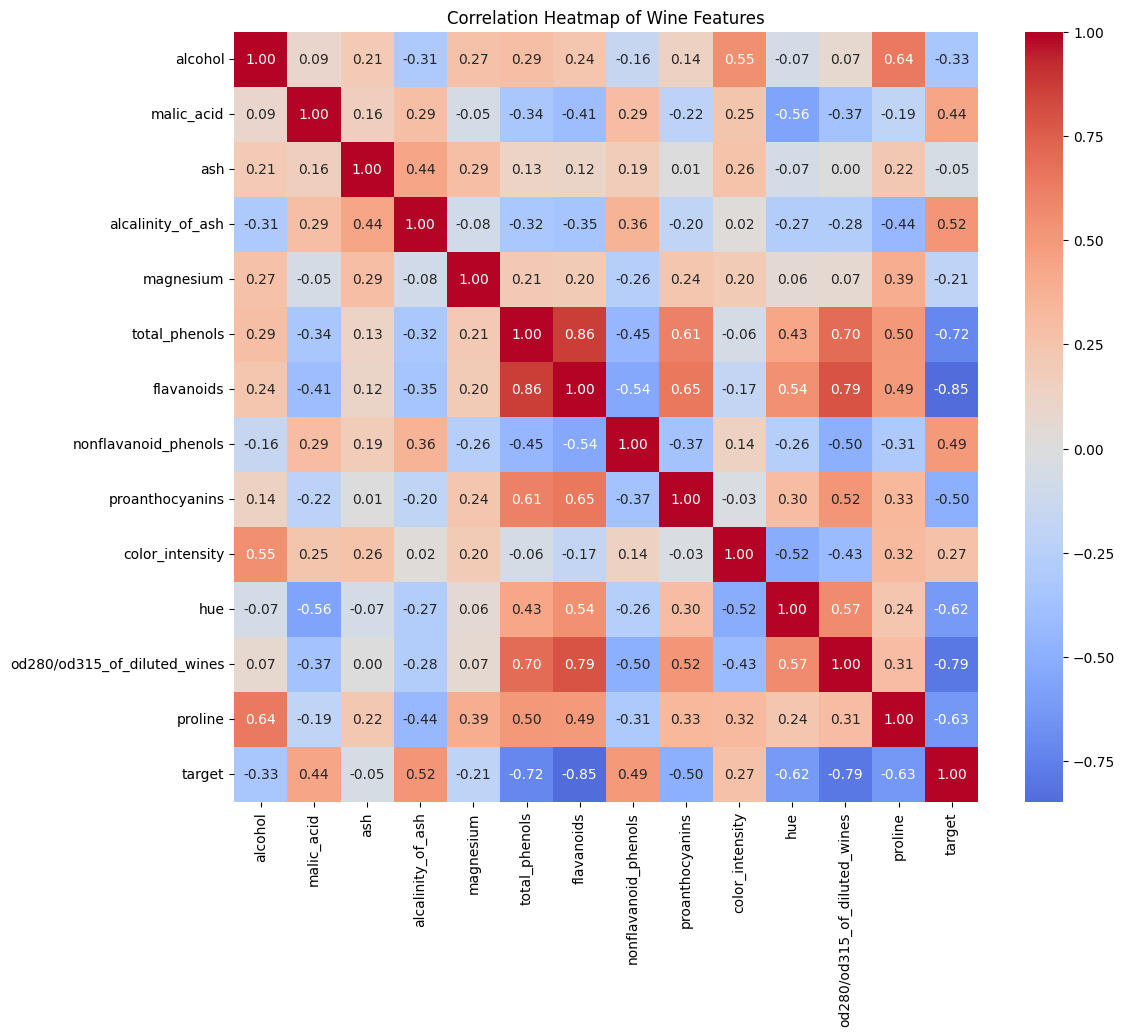


Printing Histograms...


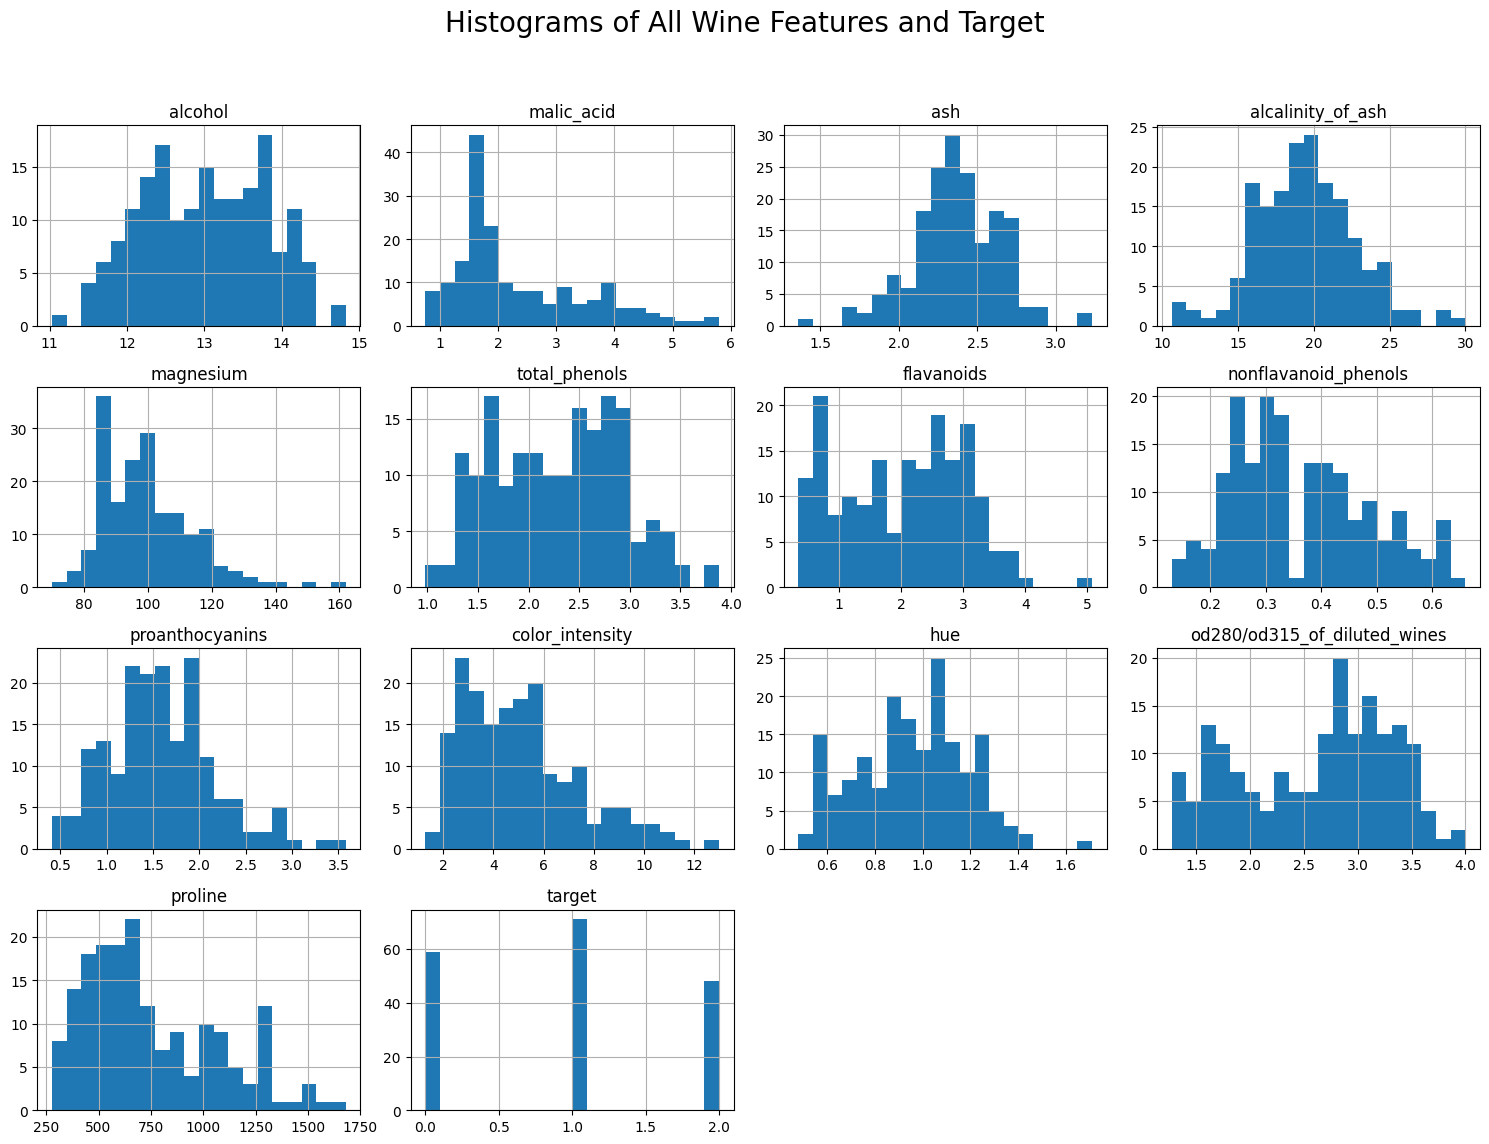

PCA Explained Variance:
PC 1 explains: 36.20%
PC 2 explains: 19.21%
Total explained: 55.41%

Data Shapes After Splitting:
Xtrain shape: (124, 13) 
Xtest shape: (54, 13) 
Ytrain shape: (105,) 
Ytest shape: (45,)

Models's Accuracy: 96.30%

Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


Plot PCA:


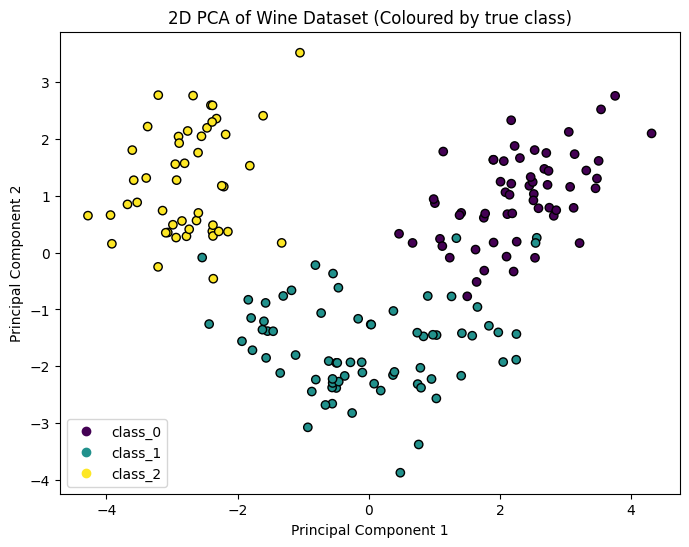

In [73]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
#Step 1: load dataset
wine=load_wine()
#Step 2: Put the features(data) and target into a pandas DataFrame
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df['target']=wine.target
#Step 3: Check missing data to handle missing values
df.info()
#Step 4: Display the first 5 rows to see what our data looks like
print("\nDataset Head (First 5 rows):\n",df.head())
#Step 5:Check the target names
print("\nTarget Classes",wine.target_names)
#Step 6:Calculate the correlation matrix
print("Plotting Correlation Heatmap:")
corr_mat=df.corr()
#Step 7: Draw the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat,annot=True,fmt='.2f',cmap='coolwarm',center=0)
plt.title("Correlation Heatmap of Wine Features")
plt.show()
#Step 8: using built in .hist() function for histogram
print("\nPrinting Histograms...")
df.hist(bins=20,figsize=(15,12),layout=(4,4))
plt.suptitle("Histograms of All Wine Features and Target",fontsize=20)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()
#Step 9:Separate features from target
X=df.drop('target',axis=1)
y=df["target"]
#Step 10:Now We standardize the features
scaler=StandardScaler()
XScaled=scaler.fit_transform(X)
Xtrain,Xtest,ytrain,ytest=train_test_split(XScaled,y,test_size=.3,random_state=42)
#Step 11: Reduce dimensions to 2D using PCA
pca=PCA(n_components=2)
XPca=pca.fit_transform(XScaled)
# Let's check the variance explained by our 2 new components
print("PCA Explained Variance:")
print(f"PC 1 explains: {pca.explained_variance_ratio_[0] * 100:.2f}%")
print(f"PC 2 explains: {pca.explained_variance_ratio_[1] * 100:.2f}%")
print(f"Total explained: {pca.explained_variance_ratio_.sum() * 100:.2f}%")
#Step 12:Print the shapes to confirm the split
print("\nData Shapes After Splitting:")
print("Xtrain shape:",Xtrain.shape,"\nXtest shape:",Xtest.shape,"\nYtrain shape:",Ytrain.shape,"\nYtest shape:",Ytest.shape)
#Step 13: Initialize the model
knn=KNeighborsClassifier(n_neighbors=5)
#Step 14: Train (fit) the model on the 2D training data
knn.fit(Xtrain,ytrain)
#Step 15: Make prediction on the "unseen" 2D test data
ypred=knn.predict(Xtest)
#Step 16: Calculate the accuracy
accuracy=accuracy_score(ytest,ypred)
print(f"\nModels's Accuracy: {accuracy*100:.2f}%")
#Step 17: Print the full Classification report
print("\nClassification Report:")
print(classification_report(ytest,ypred,target_names=wine.target_names))
#We'll plot all 178 points from our PCA data(XPca)
#We'll colour them by their true class y
print("\nPlot PCA:")
plt.figure(figsize=(8,6))
scatter=plt.scatter(XPca[:,0],XPca[:,1],c=y,cmap='viridis',edgecolor='k')
plt.title('2D PCA of Wine Dataset (Coloured by true class)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],labels=list(wine.target_names))
plt.show()